In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

pd.set_option('mode.chained_assignment',  None) # <==== 경고를 끈다

filename = '/content/drive/My Drive/bicycle_data/train.csv'

data_train = pd.read_csv(filename)

filename = '/content/drive/My Drive/bicycle_data/test.csv'

data_test = pd.read_csv(filename)

In [ ]:
data_train.head(5).transpose()

,0,1,2,3,4
date,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05
precipitation,NaN,NaN,NaN,NaN,NaN
temp_mean,-1.3,-1.8,-4.7,-4.7,-3.0
temp_highest,3.8,1.8,-0.4,-0.7,1.6
temp_lowest,-5.1,-4.3,-7.1,-8.7,-5.6
PM10,34.0,36.0,31.0,39.0,51.0
PM2.5,17.0,22.0,19.0,24.0,35.0
humidity,39.1,42.0,42.3,43.0,48.4
sunshine_sum,8.3,7.9,8.6,6.2,8.2
sunshine_rate,86.5,82.3,88.7,63.9,84.5


In [ ]:
data_test.head(5).transpose()

,0,1,2,3,4
date,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05
precipitation,NaN,NaN,NaN,0.0,0.0
temp_mean,-4.2,-5.0,-5.6,-3.5,-5.5
temp_highest,1.6,-1.4,-2.0,0.3,-2.1
temp_lowest,-9.8,-8.4,-9.1,-8.4,-9.9
PM10,30.0,34.0,39.0,40.0,30.0
PM2.5,17.0,12.0,14.0,23.0,17.0
humidity,64.0,38.5,45.0,51.4,52.8
sunshine_sum,6.5,9.0,5.5,4.6,8.6
sunshine_rate,67.7,93.8,56.7,47.4,88.7


## Feature 설명

-  date: 날짜
-  precipitation: 강수량(mm)
-  temp_mean: 평균 기온(℃)
-  temp_highest: 최고 기온(℃)
-  temp_lowest: 최저 기온(℃)
-  PM10: 미세먼지(㎍/㎥)
-  PM2.5: 초미세먼지(㎍/㎥)
-  humidity: 습도(%rh)
-  sunshine_sum: 일조합
-  sunshine_rate: 일조율
-  wind_mean: 평균 풍속(m/s)
-  wind_max: 최대 풍속(m/s)
-  rentals : 따릉이 대여량

In [ ]:
data_train.shape

(1095, 13)

In [ ]:
data_train.isnull().sum()

date               0
precipitation    678
temp_mean          0
temp_highest       0
temp_lowest        0
PM10              67
PM2.5             68
humidity           0
sunshine_sum       5
sunshine_rate      0
wind_mean          0
wind_max           0
rental             0
dtype: int64

In [ ]:
data_test.isnull().sum()

date               0
precipitation    205
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
dtype: int64

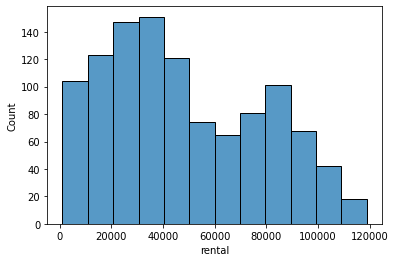

In [ ]:
sns.histplot(data_train['rental'])

In [ ]:
data_list = [data_train, data_test]

# Data preprocessing

### NAN값 replace


#### precipitation nan값 대체

precipitation == NAN이면 비가 아예 오지 않았다는 뜻이다.

In [ ]:
for data_df in data_list:
  israin = []

  for i in range(data_df.shape[0]):
    precipitation = data_df["precipitation"].iloc[i]
    if np.isnan(precipitation):
      israin.append(0)
    else:
      israin.append(1)

  data_df["israin"] = israin

In [ ]:
for data_df in data_list:
  data_df["precipitation"] = data_df["precipitation"].replace(np.nan, -0.1) #비가 아예 오지 않음 = 0

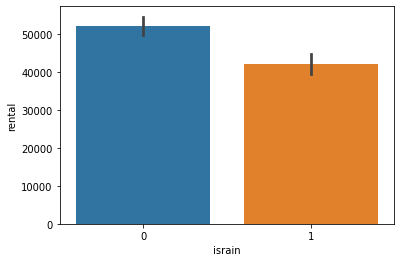

In [ ]:
sns.barplot(x = data_train["israin"], y = data_train["rental"])

#### PM10, PM2.5값 대체

In [ ]:
for data_df in data_list:
  data_df["PM10"] = data_df["PM10"].fillna(data_df["PM10"].mean())
  data_df["PM2.5"] = data_df["PM2.5"].fillna(data_df["PM2.5"].mean())
  data_df["sunshine_sum"] = data_df["sunshine_sum"].fillna(data_df["sunshine_sum"].mean())

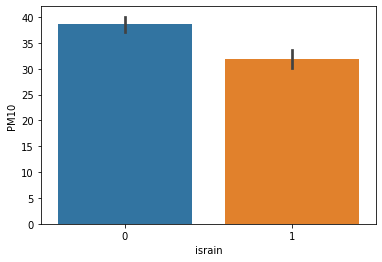

In [ ]:
sns.barplot(x = data_train["israin"], y = data_train["PM10"])

### 년도를 이용한 데이터 scale up 추가

In [ ]:
for data_df in data_list:
  year_list = []
  
  for i in range(data_df.shape[0]):
    timestamp = data_df["date"].iloc[i]
    year, month, day = map(int, timestamp.split("-"))
    if year == 2021:
      year = 2020
    year -= 2018
    year_list.append(year)

  data_df["year"] = year_list

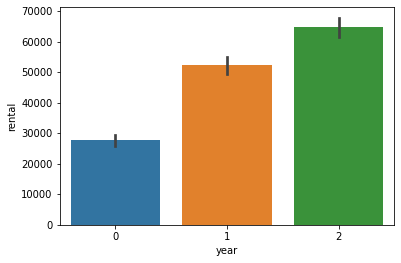

In [ ]:
sns.barplot(x = data_train["year"], y = data_train["rental"])

### 월 추가

In [ ]:
for data_df in data_list:
  month_list = []
  
  for i in range(data_df.shape[0]):
    timestamp = data_df["date"].iloc[i]
    year, month, day = map(int, timestamp.split("-"))
    month_list.append(month)

  data_df["month"] = month_list

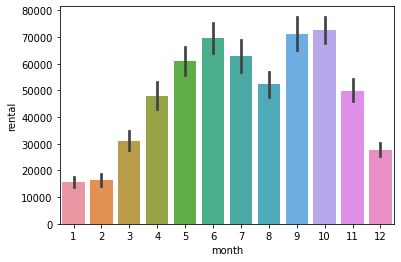

In [ ]:
sns.barplot(x = data_train["month"], y = data_train["rental"])

### 주말 / 평일 추가

In [ ]:
date_list = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

import datetime

for data_df in data_list:
  freeday = []

  # 2020-12-27 : 문자열 구성방식
  
  for i in range(data_df.shape[0]):
    timestamp = data_df["date"].iloc[i]
    year, month, day = map(int, timestamp.split("-"))

    if datetime.date(year, month, day).weekday() > 4:
      freeday.append(1)
    else:
      freeday.append(0)

  data_df["freeday"] = freeday

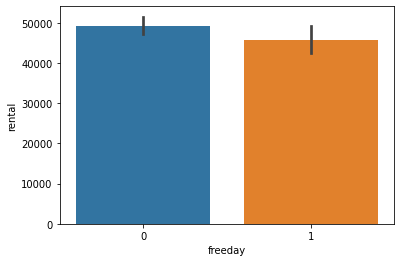

In [ ]:
sns.barplot(x = data_train["freeday"], y = data_train["rental"])

### 공휴일 추가

In [ ]:
pip install pytimekr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pytimekr import pytimekr

year_list = [2018, 2019, 2020, 2021]

result_list = []

for i in range(4):
  holi_list = pytimekr.holidays(year = year_list[i]) #holidays메소드는 리스트 형태로 관련값 반환

  for holiday in holi_list:
      result_list.append(str(holiday))

for data_df in data_list:
  result = []

  for i in range(data_df.shape[0]):
    timestamp = data_df["date"].iloc[i]
    if timestamp in result_list:
      result.append(1)
    else:
      result.append(0)

  data_df["holiday"] = result

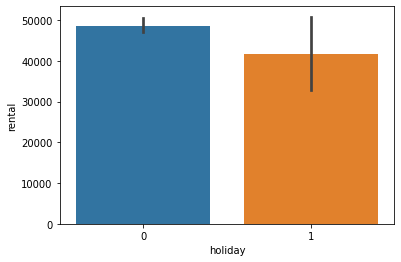

In [ ]:
sns.barplot(x = data_train["holiday"], y = data_train["rental"])

### humidity 나누기

In [ ]:
for data_df in data_list:
  data_df["humidity"] = data_df["humidity"]/100

### 불필요한 feature 버리기

In [ ]:
data_train = data_train.drop(["date"], axis = 1)
data_test = data_test.drop(["date"], axis = 1)

### 데이터셋 X, Y 나누고 스케일 조정하기

In [ ]:
data_train_X = data_train.drop(["rental"], axis = 1)
data_train_y = data_train["rental"]

In [ ]:
df_scaled = data_train_X.copy()

for column in df_scaled.columns:
  data_train_X[column] = data_train_X[column] / df_scaled[column].abs().max()
  data_test[column] = data_test[column] / df_scaled[column].abs().max()

# 모델 생성 및 학습하기

In [ ]:
data_train_X.head()

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,israin,year,month,freeday,holiday
0,-0.00097,-0.038576,0.095960,-0.168317,0.198830,0.137097,0.403093,0.610294,0.901981,0.291667,0.387755,0.0,0.0,0.083333,0.0,1.0
1,-0.00097,-0.053412,0.045455,-0.141914,0.210526,0.177419,0.432990,0.580882,0.858186,0.375000,0.500000,0.0,0.0,0.083333,0.0,0.0
2,-0.00097,-0.139466,-0.010101,-0.234323,0.181287,0.153226,0.436082,0.632353,0.924922,0.458333,0.357143,0.0,0.0,0.083333,0.0,0.0
3,-0.00097,-0.139466,-0.017677,-0.287129,0.228070,0.193548,0.443299,0.455882,0.666319,0.291667,0.357143,0.0,0.0,0.083333,0.0,0.0
4,-0.00097,-0.089021,0.040404,-0.184818,0.298246,0.282258,0.498969,0.602941,0.881126,0.354167,0.367347,0.0,0.0,0.083333,0.0,0.0


In [ ]:
data_test.head()

,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,israin,year,month,freeday,holiday
0,-0.00097,-0.124629,0.040404,-0.323432,0.175439,0.137097,0.659794,0.477941,0.705944,0.416667,0.418367,0.0,1.0,0.083333,0.0,1.0
1,-0.00097,-0.148368,-0.035354,-0.277228,0.198830,0.096774,0.396907,0.661765,0.978102,0.541667,0.551020,0.0,1.0,0.083333,1.0,0.0
2,-0.00097,-0.166172,-0.050505,-0.300330,0.228070,0.112903,0.463918,0.404412,0.591241,0.416667,0.459184,0.0,1.0,0.083333,1.0,0.0
3,0.00000,-0.103858,0.007576,-0.277228,0.233918,0.185484,0.529897,0.338235,0.494265,0.354167,0.326531,1.0,1.0,0.083333,0.0,0.0
4,0.00000,-0.163205,-0.053030,-0.326733,0.175439,0.137097,0.544330,0.632353,0.924922,0.604167,0.581633,1.0,1.0,0.083333,0.0,0.0


### 평가방법 NMAE 정의

In [ ]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

### 5-fold soft-voting

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from pytorch_tabnet.tab_model import TabNetRegressor

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *

import tensorflow as tf

tf.random.set_seed(42)

skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True) #총 10번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []
fold_score = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['israin']): #israin 기준으로 stratified k fold 진행
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X)
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    ### Create Model ###

    '''
    ### TabNet
    clf = TabNetRegressor(
      n_d = 16,
      n_a = 16,
      optimizer_params=dict(lr=2e-2),
      scheduler_params={"step_size":10, # how to use learning rate scheduler
                        "gamma":0.9},
      mask_type='sparsemax', # This will be overwritten if using pretrain model
      seed = 42
    )

    clf.fit(
        X_train=X_train, y_train=y_train.reshape(-1, 1),
        eval_set=[(X_valid, y_valid.reshape(-1, 1))],
        batch_size=1095,
        virtual_batch_size=128,
        eval_metric=['mae'],
        max_epochs = 3000,
        patience = 120,
    )

    preds_valid = clf.predict(X_valid)

    val_pred_name.append("TabNet")  # 모델 이름 저장
    val_pred.append(preds_valid)   # validation set pred 결과 저장
    '''

    ### reguler DNN model
    model = Sequential()
    model.add(Dense(32, input_dim=16, activation='elu'))
    model.add(Dense(64, activation='elu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='elu'))
    model.add(Dense(128, activation='elu'))
    model.add(Dense(64, activation='elu'))
    model.add(Dense(32, activation='elu'))
    model.add(Dense(1))

    model.compile(loss='mean_absolute_error',
                  optimizer = 'Nadam', 
                  metrics=['mae'])
    
    filename = 'nn-checkpoint.h5'
    checkpoint = ModelCheckpoint(filename,             # file명을 지정합니다
                                monitor='val_mae',   # val_accuracy 값이 개선되었을때 호출됩니다
                                verbose=0,            # 로그를 출력합니다
                                save_best_only=True,  # 가장 best 값만 저장합니다
                                mode='min'           # 평가모델이 mae이기 때문에 값이 작을때만 저장합니다 (min)
                               )

    earlystopping = EarlyStopping(monitor='val_mae', #stop 조건으로 관찰할 변수 선택
                                 patience=120,       #120 Epoch동안 (mae가)개선되지 않는다면 종료
                                 mode='min'
                                )

    reduceLR = ReduceLROnPlateau(monitor='val_mae', #lr을 낮출 조건으로 관찰할 변수 선택
                                factor=0.5,             #조건이 충족되었을때 LR에 factor를 곱함 (5분의 1배가 됨)
                                patience=80,  #80 Epoch동안 (mae가)개선되지 않는다면 lr 감소
                                mode='min'
                               )
    
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=3000, batch_size=32, verbose = 0, callbacks=[earlystopping, checkpoint, reduceLR])

    val_pred_name.append("NN")  # 모델 이름 저장
    val_pred.append(model.predict(X_valid).flatten())   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test).flatten()) # test set pred 결과 저장

    ### average validation pred ###
    preds = np.array(val_pred[0])
    
    ### average target pred ###
    target_preds = target_pred[0]
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")
    
    fold_score.append(NMAE(y_valid, preds.astype(int)))

total_score = fold_score[0]
for i in range(1, len(fold_score)):
    total_score += fold_score[i]
    
total_score = total_score/len(fold_score)

print("==============================")
print("Model Sum Average NMAE %0.4f" %(total_score))

========== fold 1 ==========
NN model NMAE : 0.1682
Average NMAE 0.1682

========== fold 2 ==========
NN model NMAE : 0.1761
Average NMAE 0.1761

========== fold 3 ==========
NN model NMAE : 0.1483
Average NMAE 0.1483

========== fold 4 ==========
NN model NMAE : 0.1210
Average NMAE 0.1210

========== fold 5 ==========
NN model NMAE : 0.1381
Average NMAE 0.1381

Model Sum Average NMAE 0.1503


In [ ]:
fold_target_pred

[array([ 10203.322 ,  15763.019 ,  14664.657 ,  22454.016 ,  19452.527 ,
         17942.535 ,  19079.32  ,  11070.607 ,   9783.067 ,  11777.935 ,
         16558.395 ,  18565.926 ,  28250.18  ,  31732.422 ,  23307.057 ,
         14629.447 ,  13173.312 ,  15205.787 ,  22579.164 ,  29776.86  ,
         18983.484 ,  17622.172 ,  35509.562 ,  34728.05  ,  36724.42  ,
         19081.68  ,  32179.697 ,  16059.436 ,  18590.08  ,  16912.83  ,
         26404.545 ,  24813.123 ,  21350.398 ,  22659.648 ,  24773.076 ,
         28425.02  ,  22252.7   ,  25821.613 ,  27003.234 ,  30398.836 ,
         28902.043 ,  29657.537 ,  27100.645 ,  20958.57  ,  29153.773 ,
         25218.701 ,  15918.394 ,  18127.371 ,  24749.36  ,  31554.414 ,
         39385.137 ,  41933.613 ,  39693.996 ,  33117.332 ,  37187.63  ,
         37106.707 ,  43522.605 ,  57325.13  ,  40028.91  ,   2183.1404,
         31195.955 ,  38677.7   ,  42783.062 ,  49861.74  ,  39379.34  ,
         47868.184 ,  45249.49  ,  44247.62  ,  440

In [ ]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = np.round(final_pred*1.3)

최종 예측시 2021년도를 2020년도로 두고 예측했기 때문에 년도가 증가할수록 증가하는 평균 따릉이 대여량을 반영하여 1.3배를 곱해준다.

In [ ]:
filename = '/content/drive/My Drive/bicycle_data/sample_submission.csv'

submission = pd.read_csv(filename)
submission.head()

,date,rental
0,2021-01-01,0
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0


In [ ]:
submission['rental'] = final_pred
submission.head()

,date,rental
0,2021-01-01,16312.0
1,2021-01-02,22521.0
2,2021-01-03,21002.0
3,2021-01-04,28738.0
4,2021-01-05,25816.0


In [ ]:
savepath = '/content/drive/My Drive/bicycle_data/submit_3_1.3.csv'
submission.to_csv(savepath,index=False)

In [ ]:
savepath = '/content/drive/My Drive/bicycle_data/submit_3_1.3.csv'

data_example = pd.read_csv(savepath)